# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt

In [9]:
# Ensure you have the necessary NLTK data files
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [11]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"Not Verified | Before my flight, I was forced ..."
1,✅ Trip Verified | British Airways at its bes...
2,✅ Trip Verified | An excellent flight! Despite...
3,✅ Trip Verified | I recently traveled with Bri...
4,✅ Trip Verified | My family and I were booke...


In [12]:
df.to_csv(r"Z:\Summer 2024\Forge\British Airway\data/BA_reviews.csv")

In [13]:
# Function to clean the text
def clean_text(text):
    text = text.replace("Not Verified |", "")
    text = text.replace("✅ Trip Verified |", "")
    text = text.strip()
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize the tokens
    return ' '.join(tokens)

In [14]:
# Apply the function to the 'reviews' column
df['cleaned_reviews'] = df['reviews'].apply(clean_text)
df.head()

,reviews,cleaned_reviews
0,"Not Verified | Before my flight, I was forced ...",flight forced ground staff check new expensive...
1,✅ Trip Verified | British Airways at its bes...,british airway best outstanding service flight...
2,✅ Trip Verified | An excellent flight! Despite...,excellent flight despite hour flight configure...
3,✅ Trip Verified | I recently traveled with Bri...,recently traveled british airway mixed experie...
4,✅ Trip Verified | My family and I were booke...,family booked leave london hong kong august ma...


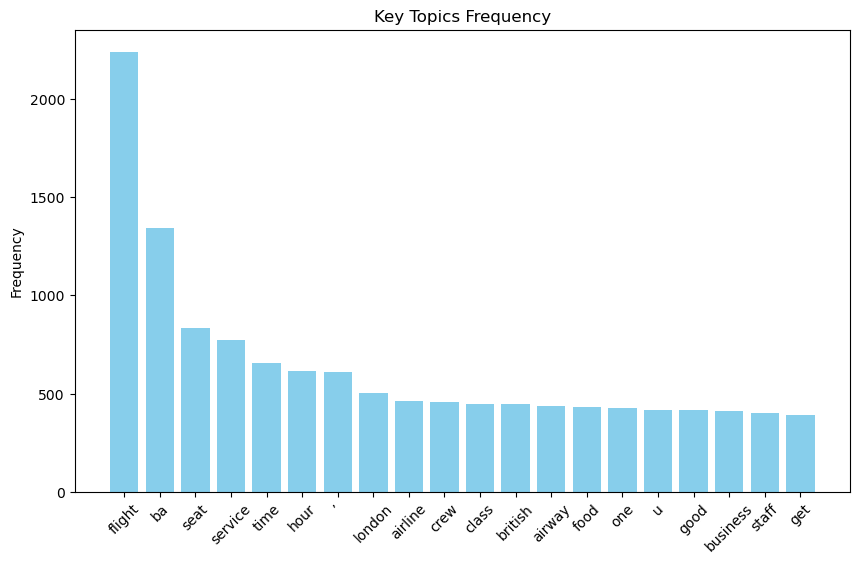

<Figure size 640x480 with 0 Axes>

In [15]:
# Tokenize the cleaned reviews and count word frequencies
all_words = ' '.join(df['cleaned_reviews']).split()
word_freq = Counter(all_words)

# Get the 20 most common words
common_words = word_freq.most_common(20)
words, frequency = zip(*common_words)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, frequency, color='skyblue')
plt.ylabel('Frequency')
plt.title('Key Topics Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
# Save the figure
plt.savefig("Z:\Summer 2024\Forge\British Airway/key_topics_frequency.png", bbox_inches='tight')

In [17]:
# Sentiment Analysis (using a basic approach)
from textblob import TextBlob

# Function to get the sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply the sentiment function to the cleaned reviews
df['sentiment'] = df['cleaned_reviews'].apply(get_sentiment)

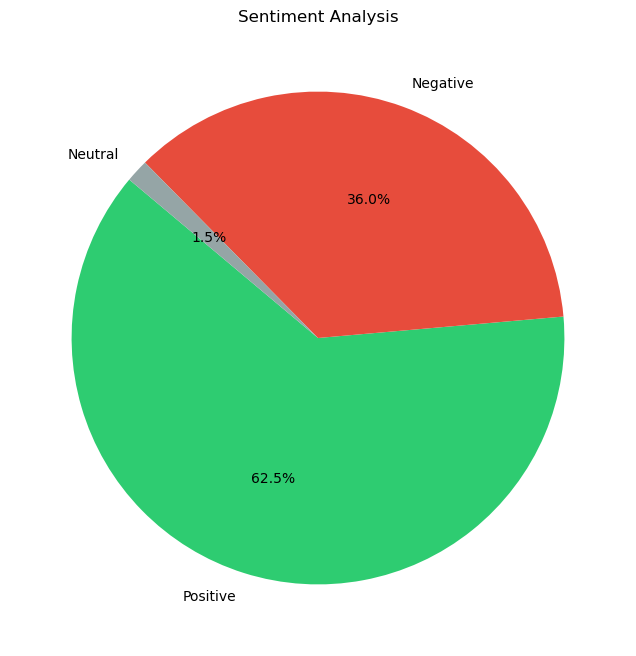

<Figure size 640x480 with 0 Axes>

In [18]:
# Classify reviews as positive, negative, or neutral based on sentiment polarity
df['sentiment_class'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Calculate the percentage of each sentiment class
sentiment_counts = df['sentiment_class'].value_counts(normalize=True) * 100
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # Green, Red, Grey
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis')
plt.show()

# Save the figure
plt.savefig("Z:\Summer 2024\Forge\British Airway/sentiment_pie_chart.png", bbox_inches='tight')